In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
dataset_cleaned_encoded = pd.read_csv('cleaned_data.csv')

In [2]:
X = dataset_cleaned_encoded.drop('charges', axis=1)  
y = dataset_cleaned_encoded['charges']  

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((1069, 11), (268, 11))

In [4]:
threshold = 20000  # Define your threshold for anomalies
y = (dataset_cleaned_encoded['charges'] > threshold).astype(int)  # 1 for anomaly, 0 for normal
X = dataset_cleaned_encoded.drop('charges', axis=1)


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [7]:
y_pred = model.predict(X_test)


In [8]:
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       208
           1       0.92      0.82      0.87        60

    accuracy                           0.94       268
   macro avg       0.94      0.90      0.92       268
weighted avg       0.94      0.94      0.94       268

Confusion Matrix:
[[204   4]
 [ 11  49]]


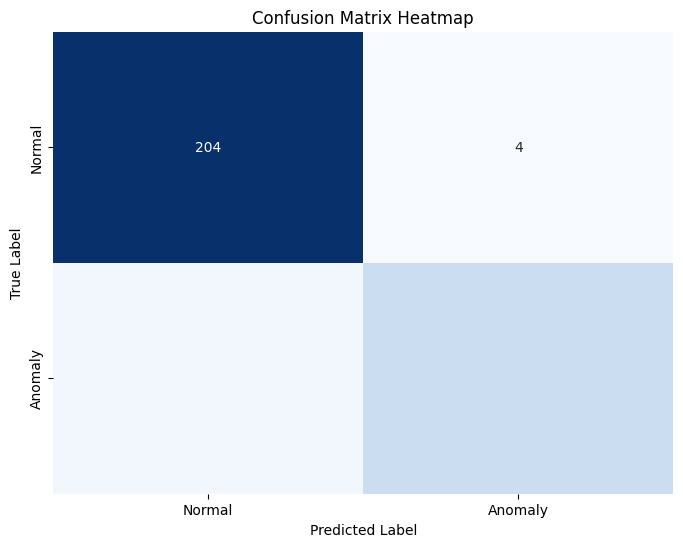

In [9]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

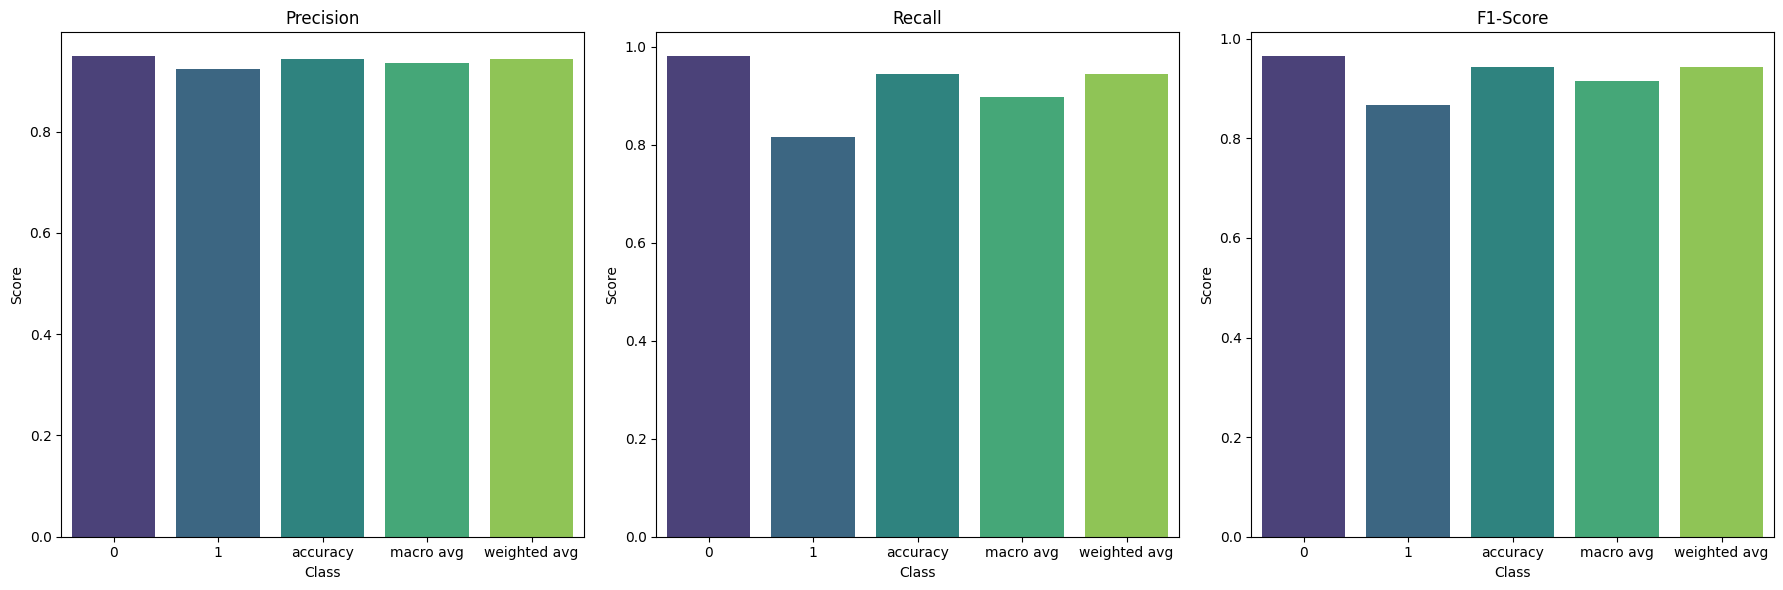

In [11]:
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Precision
sns.barplot(x=report_df.index, y=report_df['precision'], ax=ax[0], palette='viridis')
ax[0].set_title('Precision')
ax[0].set_xlabel('Class')
ax[0].set_ylabel('Score')

# Recall
sns.barplot(x=report_df.index, y=report_df['recall'], ax=ax[1], palette='viridis')
ax[1].set_title('Recall')
ax[1].set_xlabel('Class')
ax[1].set_ylabel('Score')

# F1-Score
sns.barplot(x=report_df.index, y=report_df['f1-score'], ax=ax[2], palette='viridis')
ax[2].set_title('F1-Score')
ax[2].set_xlabel('Class')
ax[2].set_ylabel('Score')

plt.tight_layout()
plt.show()


In [12]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5, scoring='f1')
print("Cross-Validation F1 Scores: ", cv_scores)
print("Mean F1 Score: ", np.mean(cv_scores))


Cross-Validation F1 Scores:  [0.80392157 0.79166667 0.83673469 0.82105263 0.88235294]
Mean F1 Score:  0.8271457003854173


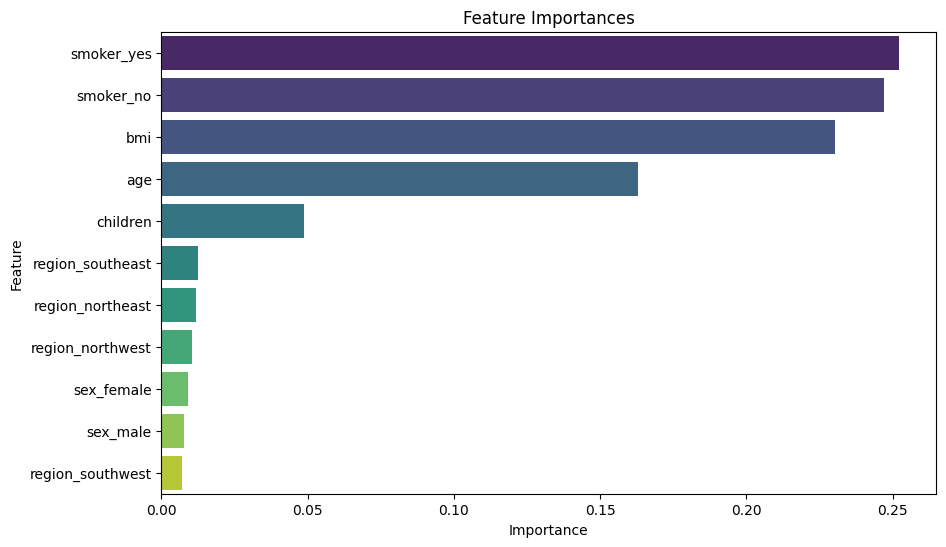

In [13]:
import pandas as pd

feature_importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importances')
plt.show()


In [14]:
import joblib

# Saving my  trained model
joblib.dump(model, 'random_forest_model.pkl')


['random_forest_model.pkl']

In [15]:
model = joblib.load('random_forest_model.pkl')
